- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [233]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [234]:
# modelos de regressão
from sklearn.linear_model import LinearRegression # se ajusta a um modelo linear minimizando a soma dos quadrados residuais entre as previsões e os valores observados
from sklearn.linear_model import Lasso # modelo de regressão linear que utiliza a regularização L1 para estimar coeficientes esparsos, ajudando a evitar o overfitting
from sklearn.linear_model import ElasticNet # método de regressão regularizada que combina penalidades de Lasso (L1) e Ridge (L2) para melhorar a previsibilidade do modelo

from sklearn.tree import DecisionTreeRegressor # utilizam uma estrutura semelhante a uma árvore para classificar dados em categorias diferentes, permitindo decisões baseadas em características das entradas
from sklearn.neighbors import KNeighborsRegressor # modelo de regressão que utiliza os k-vizinhos mais próximos para prever o alvo
from sklearn.svm import SVR # (Suporte à Regressão Vetorial) é uma técnica de aprendizado de máquina utilizada para realizar regressões e pode lidar com kernels lineares e não-lineares

from sklearn.ensemble import RandomForestRegressor # estimador meta que ajusta uma série de regressões de árvores de decisão em subamostras do conjunto de dados e usa a média para melhorar a precisão das previsões
from sklearn.ensemble import GradientBoostingRegressor # estimador que constrói um modelo aditivo de forma progressiva e permite a otimização de funções de perda diferenciáveis
from sklearn.ensemble import ExtraTreesRegressor # método de aprendizado de conjunto para tarefas de regressão que constrói múltiplas árvores de decisão e média suas previsões para melhor desempenho
from sklearn.ensemble import AdaBoostRegressor # metamodelo que começa ajustando um regressor no conjunto de dados original e, em seguida, ajusta cópias adicionais do regressor em cópias ponderadas do conjunto de dados

from sklearn.neural_network import MLPRegressor # modelo de regressão que utiliza uma rede neural de múltiplas camadas para otimizar o erro quadrático

In [235]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes

from sklearn.metrics import mean_squared_error # métrica de avaliação que mede a média dos erros quadráticos entre os valores previstos e os valores reais

In [236]:
# modelos de aprendizado profundo
from keras.models import Sequential # permite agrupar uma pilha linear de camadas em um modelo, facilitando a construção de redes neurais
from keras.layers import Dense # camada fundamental em redes neurais, onde cada neurônio está conectado a todos os neurônios da camada anterior, o que a torna amplamente utilizada em redes de múltiplas camadas
from keras.optimizers import SGD # otimizador usado em Keras que atualiza os parâmetros com base no gradiente e na taxa de aprendizado definida
from tensorflow.keras.optimizers import Adam # método de descida de gradiente estocástico que usa estimativas adaptativas de momentos de primeira e segunda ordem
from keras.layers import LSTM # camada de rede neural recorrente que é utilizada para modelar sequências temporais, capaz de aprender padrões de longo prazo em dados sequenciais

In [237]:
# modelos de séries temporais
from statsmodels.tsa.arima_model import ARIMA # modelo estatístico usado para análise de séries temporais
import statsmodels.api as sm # Modelo Estrutural é uma abordagem usada em estatística e econometria para modelar relações complexas entre variáveis

In [238]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np # computaçaõ de matrizes
from matplotlib import pyplot # plotagem gráfica

In [239]:
# carregando arquivo tratado em dataframe
df_gold_trans = pd.read_csv('df_treated/df_gold_trans.csv')

In [240]:
# conferindo a dimensão do dataframe, linhas e colunas
df_gold_trans.shape

(1206, 41)

In [241]:
# ordenando pelo index o dataframe carregado
df_gold_trans = df_gold_trans.sort_index()

In [242]:
# reconhecendo as primeiras linhas do df
df_gold_trans.head(5)

,date,sp500 open,sp500 high,sp500 low,sp500 close,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq high-low,usd_chf,silver open,silver high,silver low,silver close,silver volume,oil high-low,gold open,gold high,gold low,gold close,standard__sp500 open,standard__sp500 high,standard__sp500 low,standard__sp500 close,standard__nasdaq open,standard__nasdaq high,standard__nasdaq low,standard__nasdaq close,standard__nasdaq high-low,standard__usd_chf,standard__silver open,standard__silver high,standard__silver low,standard__silver close,standard__silver volume,standard__oil high-low,standard__gold open,standard__gold high,standard__gold low,standard__gold close
0,2010-04-01,117.80,118.25,117.10,117.80,48.34,48.70,47.79,48.16,0.91,1.0559,17.89,17.9500,17.790,17.84,96350.0,0.330,109.9700,110.4700,109.92,110.26,-2.771243,-2.778349,-2.766272,-2.770555,-2.207742,-2.205655,-2.211944,-2.211372,-0.456933,2.393095,0.373972,0.355181,0.377596,0.355303,0.079335,0.090875,-1.500334,-1.489406,-1.448056,-1.457262
1,2010-04-05,118.25,118.84,117.92,118.76,48.26,48.72,48.14,48.61,0.58,1.0619,17.95,18.1000,17.900,18.08,180524.0,0.670,110.5600,110.9837,110.27,110.89,-2.759359,-2.762784,-2.744630,-2.745236,-2.210116,-2.205064,-2.201534,-2.198044,-1.072927,2.547151,0.401619,0.423798,0.428713,0.466116,2.020602,2.264872,-1.413354,-1.413944,-1.396188,-1.364412
2,2010-04-12,119.70,120.05,119.56,119.74,49.05,49.20,48.94,49.07,0.26,1.0598,18.38,18.4600,18.110,18.12,102729.0,0.585,113.6400,114.1300,112.98,113.01,-2.721067,-2.730861,-2.701346,-2.719390,-2.186671,-2.190875,-2.177741,-2.184421,-1.670255,2.493231,0.599753,0.588479,0.526299,0.484584,0.226451,1.721372,-0.959291,-0.951758,-0.994587,-1.051965
3,2010-04-15,120.99,121.57,120.95,121.29,49.88,50.19,49.87,50.13,0.32,1.0595,18.32,18.4526,18.320,18.39,78015.0,0.460,112.9000,113.7100,112.85,113.65,-2.687000,-2.690760,-2.664660,-2.678511,-2.162039,-2.161612,-2.150082,-2.153027,-1.558256,2.485529,0.572106,0.585094,0.623885,0.609249,-0.343516,0.922109,-1.068384,-1.013456,-1.013852,-0.957641
4,2010-04-19,119.01,119.93,118.47,119.81,49.36,49.66,48.90,49.50,0.76,1.0650,17.60,17.7300,17.565,17.71,90447.0,0.440,110.8801,111.3600,110.67,111.15,-2.739289,-2.734027,-2.730114,-2.717544,-2.177471,-2.177278,-2.178931,-2.171686,-0.736930,2.626747,0.240347,0.254542,0.273040,0.295279,-0.056803,0.794227,-1.366164,-1.358666,-1.336911,-1.326093


In [243]:
# verificando a posição de cada variável
df_gold_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1206 non-null   object 
 1   sp500 open                 1206 non-null   float64
 2   sp500 high                 1206 non-null   float64
 3   sp500 low                  1206 non-null   float64
 4   sp500 close                1206 non-null   float64
 5   nasdaq open                1206 non-null   float64
 6   nasdaq high                1206 non-null   float64
 7   nasdaq low                 1206 non-null   float64
 8   nasdaq close               1206 non-null   float64
 9   nasdaq high-low            1206 non-null   float64
 10  usd_chf                    1206 non-null   float64
 11  silver open                1206 non-null   float64
 12  silver high                1206 non-null   float64
 13  silver low                 1206 non-null   float

In [244]:
# separando variáveis independentes(x) e dependentes(y)
X = df_gold_trans[list(df_gold_trans.columns[21:40])]
y = df_gold_trans[['standard__gold close']]

In [245]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   standard__sp500 open       1206 non-null   float64
 1   standard__sp500 high       1206 non-null   float64
 2   standard__sp500 low        1206 non-null   float64
 3   standard__sp500 close      1206 non-null   float64
 4   standard__nasdaq open      1206 non-null   float64
 5   standard__nasdaq high      1206 non-null   float64
 6   standard__nasdaq low       1206 non-null   float64
 7   standard__nasdaq close     1206 non-null   float64
 8   standard__nasdaq high-low  1206 non-null   float64
 9   standard__usd_chf          1206 non-null   float64
 10  standard__silver open      1206 non-null   float64
 11  standard__silver high      1206 non-null   float64
 12  standard__silver low       1206 non-null   float64
 13  standard__silver close     1206 non-null   float

In [246]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [247]:
# hiperparâmetros do CV
num_folds = 10
scoring = 'neg_mean_squared_error'

In [248]:
# implementando os modelos de ML
models = []

# regressão e árvore de regressão
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# rede neural
models.append(('MLP', MLPRegressor()))

# ensemble - boosting
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# ensemble - bagging
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos: 'EN', 'LASSO', 'LR', 'KNN', 'SVR', 'MLP', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'

In [249]:
# obtendo os scores do k-fold e o erro quadrático médio entre o resultado conhecido e o resultado previsto
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    if name in ('EN', 'LASSO'): #'EN', 'LASSO'): 
        divisorC, divisorK=1, 1
        divisorC=100 # modificando a escala para visualizar no gráfico   
        #divisorK=10  
    else:
        if name in ('LR', 'KNN', 'SVR', 'MLP', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'): 
            divisorC, divisorK=1, 1
            #divisorK=0.1 # modificando a escala para visualizar no gráfico  
            #divisorC=0.1          

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    kfold_results.append(cv_results/divisorK)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result/divisorC)
    if name in ('LR'):
        LR_model = res

    # resultado dos testes
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result/divisorC)

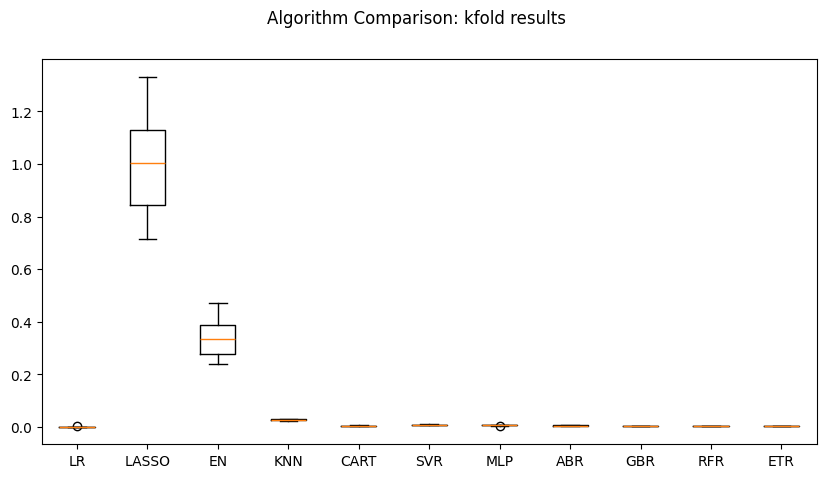

In [250]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 

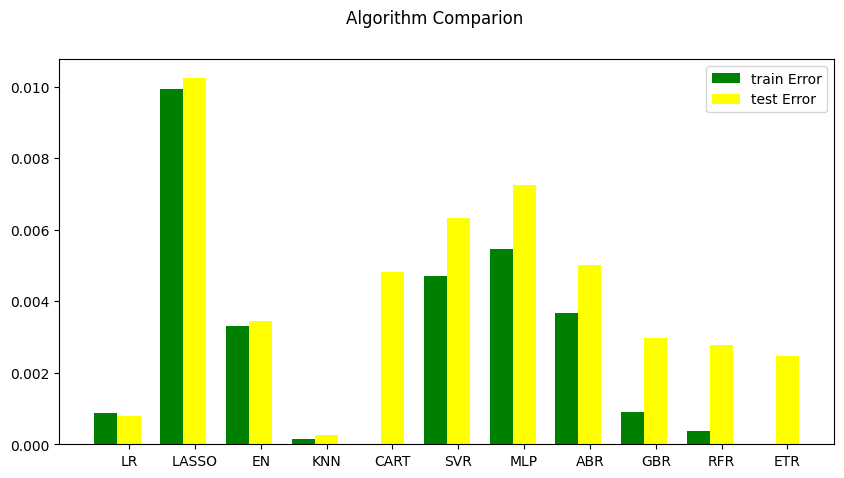

In [251]:
# analisando o erro de treinamento e de teste
# comparando algoritmos
fig = pyplot.figure()

ind = np.arange(len(names)) # as localidades x para os grupos
width = 0.35 # largura das barras

fig.suptitle('Algorithm Comparion')
ax = fig.add_subplot(111)
pyplot.bar(ind - width, train_results, width=width, label='train Error', color='green')
pyplot.bar(ind, test_results, width=width, label='test Error', color='yellow')
fig.set_size_inches(10,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.savefig('grafic_image/compara_erro.png', format='png')
pyplot.show()


- Um valor elevado de Mean Squared Error (MSE) indica que o modelo não está fazendo previsões próximas dos valores reais, sugerindo uma baixa precisão nas suas previsões.

- Quando o erro quadrático médio (MSE) do conjunto de teste é maior que o do conjunto de treinamento, isso pode indicar um problema de overfitting, onde o modelo se ajustou muito bem aos dados de treinamento, mas não generaliza bem para os dados novos.

### Treinando o Modelo ARIMA

In [252]:
# preparando conjunto de dados para modelos ARIMA
# deixando variáveis correlacionadas como variáveis exógenas

X_train_ARIMA = X_train.loc[:, list(X.columns)]
X_test_ARIMA = X_test.loc[:, list(X.columns)]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)

In [253]:
# treinando o modelo ARIMA
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model_arima = sm.tsa.arima.ARIMA(endog= Y_train, exog= X_train_ARIMA, order=[1,0,0])
ARIMAModel = model_arima.fit()

error_training_ARIMA = mean_squared_error(Y_train, ARIMAModel.fittedvalues)
predicated = ARIMAModel.predict(start= tr_len -1, end= to_len -1, exog= X_test_ARIMA)[1:]
error_test_ARIMA = mean_squared_error(Y_test, predicated)

In [254]:
print('error_training_ARIMA', error_training_ARIMA)
print('error_test_ARIMA', error_test_ARIMA)
#print('predicated', predicated.head(5))

error_training_ARIMA 0.0008726845450003024
error_test_ARIMA 0.0007898411540119807


### Treinando o Modelo LST

In [255]:
# treinando o modelo LST
seq_len = 2 #Comprimento da seq para o LSTM 
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test) 
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1])) 
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1])) 
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :] 
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [256]:
# LSTM Network 
def create_LSTMmodel(learn_rate = 0.01, momentum=0.0): 
    # criação do modelo 
    model = Sequential() 
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2]))) 

    #Mais células podem ser acrescentadas, se necessário 
    model.add(Dense(1))
    optimizer = SGD(momentum=momentum) 
    #optimizer = SGD(lr=learn_rate, momentum=momentum) 
    model.compile(loss='mse', optimizer='adam') 
    return model 

In [257]:
LSTMModel = create_LSTMmodel(learn_rate = 0.01, momentum=0.0) 
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,  
                    validation_data=(X_test_LSTM, Y_test_LSTM),
                    epochs=330, batch_size=72, verbose=0, shuffle=False)

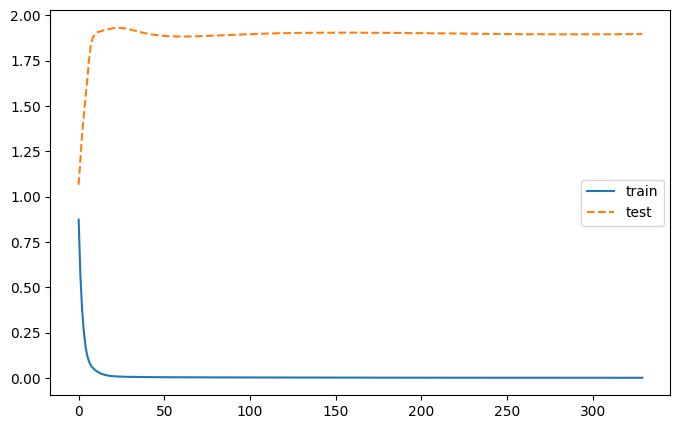

In [258]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train', ) 
pyplot.plot(LSTMModel_fit.history['val_loss'], '--',label='test',) 
pyplot.legend() 
pyplot.show()

In [259]:
error_training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM)) 
predicted = LSTMModel.predict(X_test_LSTM) 
error_test_LSTM = mean_squared_error(Y_test,predicted)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [260]:
# inserindo erros nas listas
test_results.append(error_test_ARIMA) 
test_results.append(error_test_LSTM) 
train_results.append(error_training_ARIMA) 
train_results.append(error_training_LSTM)

In [261]:
# inserindo nomes de modelos na lista names
names.append('ARIMA') 
names.append('LSTM')

In [262]:
# criando a variável model_fit
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')
xx=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=(0,0,0)) 
model_fit = xx.fit()

In [263]:
# treina modelo arima conforme order
def evaluate_arima_model(arima_order):
    #previsto = list() 
    global model_fit

    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order) 
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues) 

    return error     

In [264]:
# avaliar combinações dos valores de p, d e q para um modelo ARIMA 
def evaluate_models(p_values, d_values, q_values): 

    best_score, best_cfg = float('inf'), None 
    for p in p_values: 
        for d in d_values: 
            for q in q_values: 
                order = (p,d,q) 
                try:                   
                    mse = evaluate_arima_model(order) 
                    if mse < best_score: 
                        best_score, best_cfg = mse, order 
                    print('ARIMA%s MSE=%.7f' % (order,mse)) 
                except: 
                    continue 
            print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score)) 

In [265]:
# avaliação de parâmetros 
p_values = [0, 1, 2] 
d_values = range(0, 2) 
q_values = range(0, 2) 

warnings.filterwarnings('ignore')
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.0008727
ARIMA(0, 0, 1) MSE=0.0008727
Best ARIMA(0, 0, 1) MSE=0.0008727
ARIMA(0, 1, 0) MSE=0.0017488
ARIMA(0, 1, 1) MSE=0.0009276
Best ARIMA(0, 0, 1) MSE=0.0008727
ARIMA(1, 0, 0) MSE=0.0008727
ARIMA(1, 0, 1) MSE=0.0008724
Best ARIMA(1, 0, 1) MSE=0.0008724
ARIMA(1, 1, 0) MSE=0.0013459
ARIMA(1, 1, 1) MSE=0.0009509
Best ARIMA(1, 0, 1) MSE=0.0008724
ARIMA(2, 0, 0) MSE=0.0008713
ARIMA(2, 0, 1) MSE=0.0008712
Best ARIMA(2, 0, 1) MSE=0.0008712
ARIMA(2, 1, 0) MSE=0.0011814
ARIMA(2, 1, 1) MSE=0.0009523
Best ARIMA(2, 0, 1) MSE=0.0008712


In [266]:
# preparação do modelo
#from statsmodels.tsa.arima.model import ARIMA

modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1]) 
model_fit_tuned = modelARIMA_tuned.fit() 

In [267]:
# estimar a acurácia no conjunto de validação 
predicted_tuned = model_fit.predict(start = tr_len -1 , end = to_len -1, exog = X_test_ARIMA)[1:] 
print(mean_squared_error(Y_test,predicted_tuned))

0.0009032218506547443


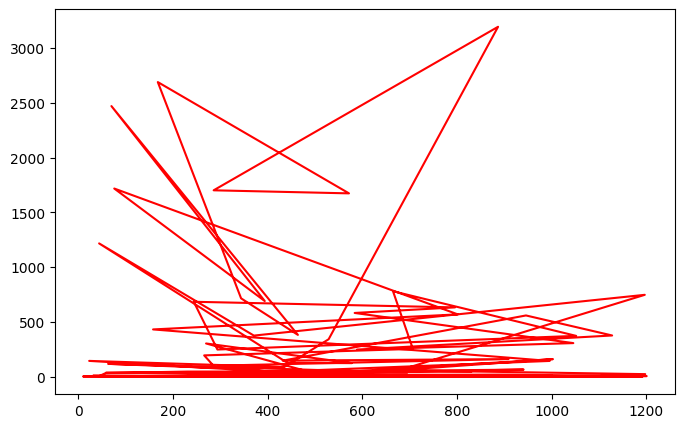

In [268]:
# plotar os dados reais comparados com os previstos 
predicted_tuned.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',) 

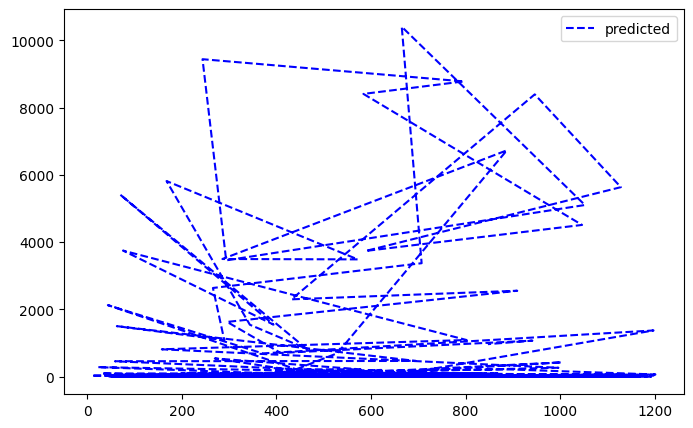

In [269]:
# plotar t e a de forma separada 
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted') 
pyplot.legend() 
pyplot.rcParams['figure.figsize'] = (8,5) 
pyplot.show()

## Faz o Deploy do Modelo

In [270]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(LR_model, 'model/LR_gold_price.pkl')

['model/LR_gold_price.pkl']